# Laboratorio 1 Grupo 1

- Nombre: Dimar Gabriel Lopez Chiri

## Ejemplificación de uso de regresión lineal multivariable, polinómica y con la ecuación de la normal

In [196]:
#Librerías necesarias para el funcionamiento
import os
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [187]:
# Leer datos por numpy
data = np.genfromtxt('/content/drive/MyDrive/SIS420_IA/lab 1 cuadernillo y dataset/part_leeds_energy_mix_V2.csv', delimiter=',', usecols=(31, 36, 38, 44, 45, 50, 51), skip_header=1)
X, y = data[:, :-1], data[:, -1]
m = y.size

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime


In [193]:
# Leer el archivo CSV por pandas y tomar 20000 datos
data = pd.read_csv('/content/drive/MyDrive/SIS420_IA/lab 1 cuadernillo y dataset/part_leeds_energy_mix_V2.csv', usecols=[31, 36, 38, 44, 45, 50, 51], nrows=20000)

# Mover la columna 'Air Temperature_SPN' a la posición final
cols = data.columns.tolist()
cols.append(cols.pop(cols.index('Air Temperature_SPN')))
data = data[cols]

# Calcular la moda de la columna 'Air Temperature_SPN'
moda_temp = data['Air Temperature_SPN'].mode()[0]

# Crear una copia del DataFrame original
data_original = data.copy()
# Reemplazar los valores extremadamente altos con la moda
data.loc[data['Air Temperature_SPN'] >= 7000, 'Air Temperature_SPN'] = moda_temp

# Calcular la media de las columnas específicas
media_columnas = data.mean()

# Llenar los datos faltantes en las columnas específicas con la media calculada
data.fillna(media_columnas, inplace=True)

# Verificar que ya no hay valores NaN en el DataFrame
print("Cantidad de NaN por columna después de llenar los datos faltantes:")
print(data.isna().sum())

data.info()


Número de datos reemplazados con la moda: 0
Cantidad de NaN por columna después de llenar los datos faltantes:
Longwave Radiation - Incoming_HOL     0
Relative Humidity_HOL                 0
Shortwave Radiation - Incoming_HOL    0
Atmospheric Pressure_SPN              0
Precipitation (Pluvio)_SPN            0
Wind Direction_SPN                    0
Air Temperature_SPN                   0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Longwave Radiation - Incoming_HOL   20000 non-null  float64
 1   Relative Humidity_HOL               20000 non-null  float64
 2   Shortwave Radiation - Incoming_HOL  20000 non-null  float64
 3   Atmospheric Pressure_SPN            20000 non-null  float64
 4   Precipitation (Pluvio)_SPN          20000 non-null  float64
 5   Wind Direction_SPN          

In [194]:
# Verificar si hay valores mayores a 100 en la columna 'Air Temperature_SPN'
valores_mayores_100 = (data['Air Temperature_SPN'] > 16).sum()

# Mostrar el resultado
if valores_mayores_100 > 0:
    print("Hay", valores_mayores_100, "valores mayores a 100 en la columna 'Air Temperature_SPN'.")
else:
    print("No hay valores mayores a 100 en la columna 'Air Temperature_SPN'.")

Hay 204 valores mayores a 100 en la columna 'Air Temperature_SPN'.


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Longwave Radiation - Incoming_HOL   20000 non-null  float64
 1   Relative Humidity_HOL               20000 non-null  float64
 2   Shortwave Radiation - Incoming_HOL  20000 non-null  float64
 3   Atmospheric Pressure_SPN            20000 non-null  float64
 4   Precipitation (Pluvio)_SPN          20000 non-null  float64
 5   Wind Direction_SPN                  20000 non-null  float64
 6   Air Temperature_SPN                 20000 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB


In [136]:
# Lectura de Datos
X = data.iloc[:, :6]
y = data.iloc[:, 6]
m = y.size

In [137]:
print(X)
print(y)

       Longwave Radiation - Incoming_HOL  Relative Humidity_HOL  \
0                                  368.1                  94.90   
1                                  370.3                  95.30   
2                                  371.7                  96.00   
3                                  375.0                  96.40   
4                                  373.2                  95.30   
...                                  ...                    ...   
19995                              309.1                  69.02   
19996                              310.2                  69.33   
19997                              311.8                  70.80   
19998                              313.8                  71.82   
19999                              313.7                  71.47   

       Shortwave Radiation - Incoming_HOL  Atmospheric Pressure_SPN  \
0                                   54.76                  984.3832   
1                                   33.92            

In [138]:
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [139]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = normalizarCaracteristicas(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

       Longwave Radiation - Incoming_HOL  Relative Humidity_HOL  \
0                                  368.1                  94.90   
1                                  370.3                  95.30   
2                                  371.7                  96.00   
3                                  375.0                  96.40   
4                                  373.2                  95.30   
...                                  ...                    ...   
19995                              309.1                  69.02   
19996                              310.2                  69.33   
19997                              311.8                  70.80   
19998                              313.8                  71.82   
19999                              313.7                  71.47   

       Shortwave Radiation - Incoming_HOL  Atmospheric Pressure_SPN  \
0                                   54.76                  984.3832   
1                                   33.92            

In [140]:
def graficarDatos(x, y, xlabel, ylabel):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro')
  pyplot.xlabel(xlabel)
  pyplot.ylabel(ylabel)

X_norm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Longwave Radiation - Incoming_HOL   20000 non-null  float64
 1   Relative Humidity_HOL               20000 non-null  float64
 2   Shortwave Radiation - Incoming_HOL  20000 non-null  float64
 3   Atmospheric Pressure_SPN            20000 non-null  float64
 4   Precipitation (Pluvio)_SPN          20000 non-null  float64
 5   Wind Direction_SPN                  20000 non-null  float64
dtypes: float64(6)
memory usage: 937.6 KB


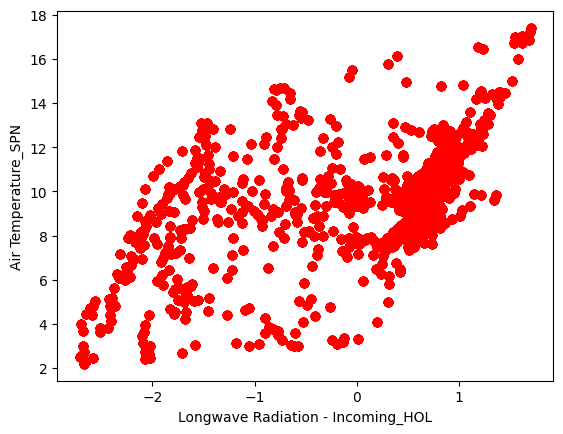

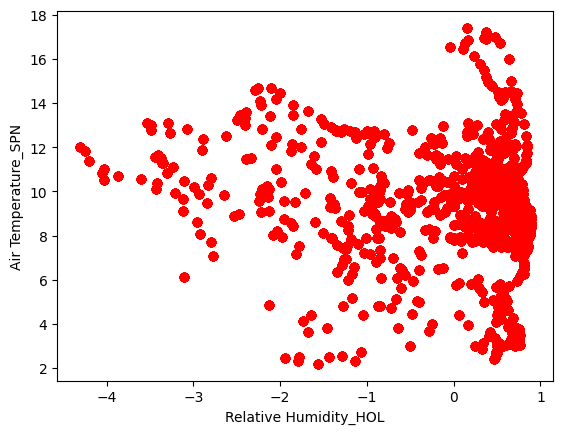

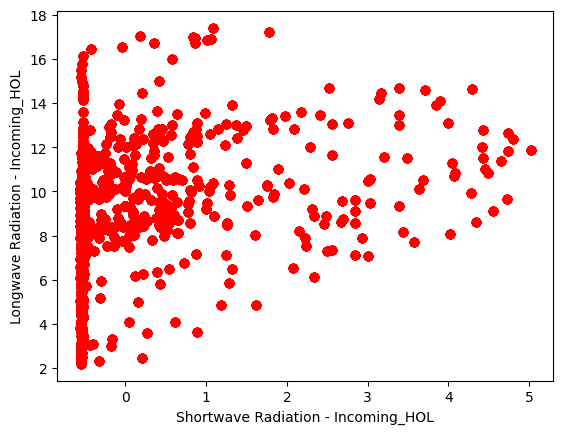

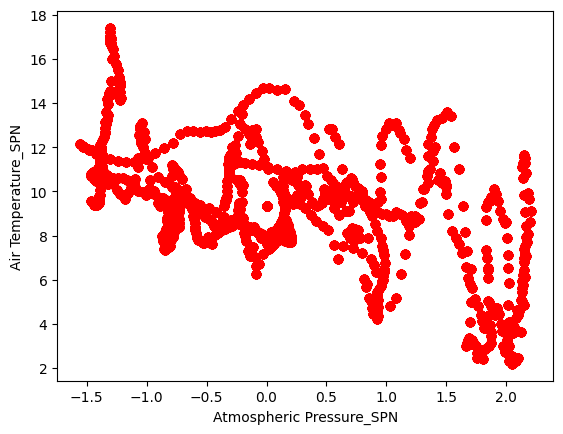

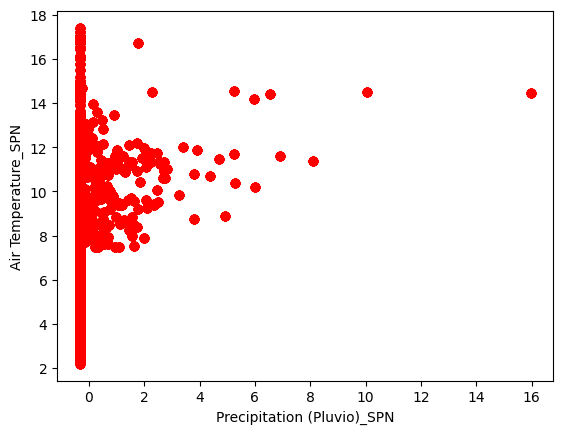

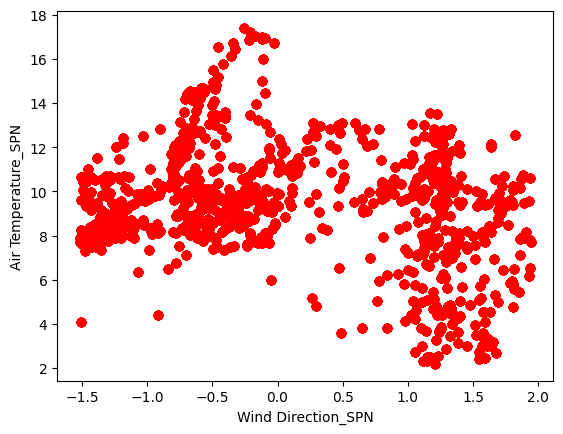

In [141]:
xlabel1 = "Longwave Radiation - Incoming_HOL"
xlabel2 = "Relative Humidity_HOL"
xlabel3 = "Shortwave Radiation - Incoming_HOL"
xlabel4 = "Atmospheric Pressure_SPN"
xlabel5 = "Precipitation (Pluvio)_SPN"
xlabel6 = "Wind Direction_SPN"
ylabel1 = "Air Temperature_SPN"

# Graficar
graficarDatos(X_norm[xlabel1], y, xlabel1, ylabel1)
graficarDatos(X_norm[xlabel2], y, xlabel2, ylabel1)
graficarDatos(X_norm[xlabel3], y, xlabel3, xlabel1)
graficarDatos(X_norm[xlabel4], y, xlabel4, ylabel1)
graficarDatos(X_norm[xlabel5], y, xlabel5, ylabel1)
graficarDatos(X_norm[xlabel6], y, xlabel6, ylabel1)


In [142]:
# No olvidarse agregar unos a la matriz de x
#munos = np.ones([m, 1]).unsqueese
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [143]:
print(X)

[[ 1.          0.8969547   0.32175656 ... -0.64060809  0.28354281
  -0.36777368]
 [ 1.          0.95974516  0.36211527 ... -0.67456087 -0.33033021
  -0.25173032]
 [ 1.          0.99970273  0.43274303 ... -0.70256099 -0.23824926
  -0.27315124]
 ...
 [ 1.         -0.70991021 -2.10985611 ... -0.03272563 -0.33033021
  -0.58692613]
 [ 1.         -0.65282798 -2.00694138 ... -0.08729432 -0.33033021
  -0.60125674]
 [ 1.         -0.65568209 -2.04225526 ... -0.15031482 -0.33033021
  -0.63213893]]


In [144]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [ 9.25852674  1.00380469 -1.38595408  0.44656169 -1.37216773  0.12264378
  0.02253514]
10.663422191781777


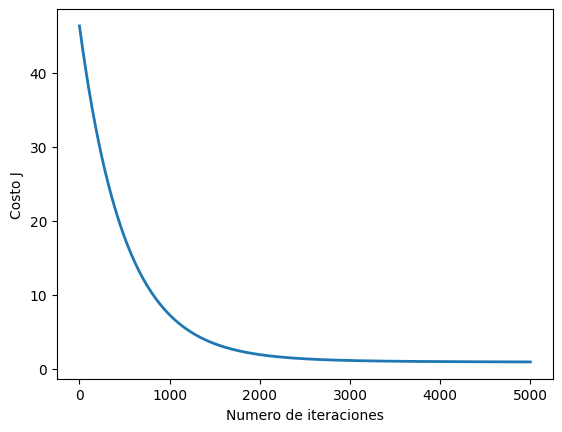

In [145]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(7)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

X_array = [1, 368.1,94.90,54.76,984.3832,0.20,119.40396]
X_array[1:7] = (X_array[1:7] - mu) / sigma

price = np.dot(X_array, theta)
print(format(price))

In [146]:
#Utilizando la ecuacion de la normal , se declara otra vez X porque la anterior esta normalizada
X = data.iloc[:, :6]
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [147]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [148]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1, 368.1,94.90,54.76,984.3832,0.20,119.40396]
price = np.dot(X_array, theta)

print(format(price))

Theta calculado a partir de la ecuación de la normal: [ 1.24356448e+02  4.02527091e-02 -2.00020733e-01  9.64512423e-04
 -1.11334316e-01  2.48292631e-01  1.03671622e-03]
10.822135461986365


In [149]:
X_array = [1, 368.1,94.90,54.76,984.3832,0.20,119.40396]
price = np.dot(X_array, theta)

print(format(price))

10.822135461986365


# Programación de Regresión Polinomial


In [201]:
# Lectura de Datos
X = data.iloc[:, :6]
y = data.iloc[:, 6]
m = y.size
print(X)

       Longwave Radiation - Incoming_HOL  Relative Humidity_HOL  \
0                                  368.1                  94.90   
1                                  370.3                  95.30   
2                                  371.7                  96.00   
3                                  375.0                  96.40   
4                                  373.2                  95.30   
...                                  ...                    ...   
19995                              309.1                  69.02   
19996                              310.2                  69.33   
19997                              311.8                  70.80   
19998                              313.8                  71.82   
19999                              313.7                  71.47   

       Shortwave Radiation - Incoming_HOL  Atmospheric Pressure_SPN  \
0                                   54.76                  984.3832   
1                                   33.92            

In [202]:

X = np.concatenate([X, X * X], axis=1)

In [203]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

X_norm, mu, sigma = featureNormalize(X)

In [205]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print(X)

[[ 1.          0.8969547   0.32175656 ... -0.64175321 -0.07855244
  -0.57225089]
 [ 1.          0.95974516  0.36211527 ... -0.67529565 -0.11897659
  -0.49126473]
 [ 1.          0.99970273  0.43274303 ... -0.70294661 -0.11806704
  -0.50679975]
 ...
 [ 1.         -0.70991021 -2.10985611 ... -0.03879618 -0.11897659
  -0.70397837]
 [ 1.         -0.65282798 -2.00694138 ... -0.0931101  -0.11897659
  -0.71162571]
 [ 1.         -0.65568209 -2.04225526 ... -0.15579036 -0.11897659
  -0.7277023 ]]


In [206]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history


theta calculado por el descenso por el gradiente: [ 9.25852674  0.60465817 -0.84800079  0.24110515 -0.7149602   0.00935186
  0.21028656  0.61338929 -0.92696101 -0.01224606 -0.71509319  0.10577233
 -0.16997119]
10.77841322149426


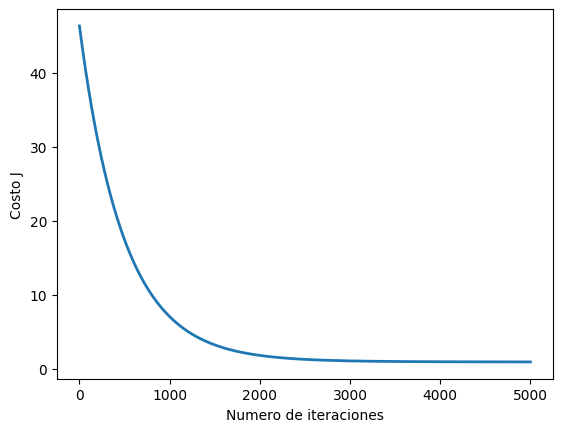

In [217]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(13)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

X_array = np.array([1, 368.1, 94.90, 54.76, 984.3832, 0.20, 119.40396])

# Elevar al cuadrado los elementos del array original
X_squared = np.square(X_array[1:])

# Concatenar los elementos originales y los elementos elevados al cuadrado
X_array = np.concatenate((X_array, X_squared))
X_array[1:13] = (X_array[1:13] - mu) / sigma
price = np.dot(X_array, theta)

print(format(price))

# Uso de distintos datos para ejemplificar el uso de este método

Longwave Radiation - Incoming_HOL: Esta columna representa la radiación de onda larga entrante (en vatios por metro cuadrado) medida en el tope de la atmósfera. La radiación de onda larga es emitida por la superficie de la Tierra y los gases en la atmósfera en respuesta a la radiación solar incidente.

Relative Humidity_HOL: Esta columna representa la humedad relativa (en porcentaje) medida en el tope de la atmósfera. La humedad relativa es la relación entre la cantidad de vapor de agua presente en el aire y la cantidad máxima que podría contener a una temperatura dada.

Shortwave Radiation - Incoming_HOL: Esta columna representa la radiación de onda corta entrante (en vatios por metro cuadrado) medida en el tope de la atmósfera. La radiación de onda corta es la energía solar que llega a la Tierra desde el sol.

Atmospheric Pressure_SPN: Esta columna representa la presión atmosférica (en hectopascales) medida en un lugar específico.

Precipitation (Pluvio)_SPN: Esta columna representa la precipitación (en milímetros) medida en un lugar específico. La precipitación puede incluir lluvia, nieve, granizo, etc.

Wind Direction_SPN: Esta columna representa la dirección del viento (en grados) medida en un lugar específico.

In [219]:
# Uso de distintos datos para ejemplificar el uso de este método
X_array = np.array([1, 370.3, 95.30, 33.92, 983.9634, 0.00, 131.45196])

# Elevar al cuadrado los elementos del array original
X_squared = np.square(X_array[1:])

# Concatenar los elementos originales y los elementos elevados al cuadrado
X_array = np.concatenate((X_array, X_squared))
X_array[1:13] = (X_array[1:13] - mu) / sigma
price = np.dot(X_array, theta)
print(format(price))

10.776622026249


In [221]:
X_array = np.array([1,371.7, 96.00, 93.10, 983.6172, 0.03, 129.22797])

# Elevar al cuadrado los elementos del array original
X_squared = np.square(X_array[1:])

# Concatenar los elementos originales y los elementos elevados al cuadrado
X_array = np.concatenate((X_array, X_squared))
X_array[1:13] = (X_array[1:13] - mu) / sigma
price = np.dot(X_array, theta)
print(format(price))


10.89041185039898


In [223]:
X_array = np.array([1, 375.0, 96.40, 83.90, 983.3093, 0.32, 136.19848])

# Elevar al cuadrado los elementos del array original
X_squared = np.square(X_array[1:])

# Concatenar los elementos originales y los elementos elevados al cuadrado
X_array = np.concatenate((X_array, X_squared))
X_array[1:13] = (X_array[1:13] - mu) / sigma
price = np.dot(X_array, theta)
print(format(price))


10.973014377411479


In [225]:
X_array = np.array([1, 373.2, 95.30, 35.55, 983.1702, 0.00, 143.56286])

# Elevar al cuadrado los elementos del array original
X_squared = np.square(X_array[1:])

# Concatenar los elementos originales y los elementos elevados al cuadrado
X_array = np.concatenate((X_array, X_squared))
X_array[1:13] = (X_array[1:13] - mu) / sigma
price = np.dot(X_array, theta)
print(format(price))


10.990644455373198


In [227]:
 X_array = np.array([1, 309.1, 69.02, 374.60, 993.3548, 0.00, 100.04860])

# Elevar al cuadrado los elementos del array original
X_squared = np.square(X_array[1:])

# Concatenar los elementos originales y los elementos elevados al cuadrado
X_array = np.concatenate((X_array, X_squared))
X_array[1:13] = (X_array[1:13] - mu) / sigma
price = np.dot(X_array, theta)
print(format(price))



13.030991192930108


In [228]:
X_array = np.array([1,  310.2, 69.33, 346.50, 992.6000, 0.03, 98.56874])

# Elevar al cuadrado los elementos del array original
X_squared = np.square(X_array[1:])

# Concatenar los elementos originales y los elementos elevados al cuadrado
X_array = np.concatenate((X_array, X_squared))
X_array[1:13] = (X_array[1:13] - mu) / sigma
price = np.dot(X_array, theta)
print(format(price))

13.035745825049348


In [229]:

X_array = np.array([1, 311.8, 70.80, 269.80, 991.8992, 0.00, 96.65084])

# Elevar al cuadrado los elementos del array original
X_squared = np.square(X_array[1:])

# Concatenar los elementos originales y los elementos elevados al cuadrado
X_array = np.concatenate((X_array, X_squared))
X_array[1:13] = (X_array[1:13] - mu) / sigma
price = np.dot(X_array, theta)
print(format(price))



12.73587963370116


In [230]:

X_array = np.array([1,   313.8, 71.82, 326.80, 991.2245, 0.00, 95.16299])

# Elevar al cuadrado los elementos del array original
X_squared = np.square(X_array[1:])

# Concatenar los elementos originales y los elementos elevados al cuadrado
X_array = np.concatenate((X_array, X_squared))
X_array[1:13] = (X_array[1:13] - mu) / sigma
price = np.dot(X_array, theta)
print(format(price))



12.853117292183745


In [231]:

X_array = np.array([1, 313.7, 71.47, 325.00, 990.4453, 0.00, 91.95670])

# Elevar al cuadrado los elementos del array original
X_squared = np.square(X_array[1:])

# Concatenar los elementos originales y los elementos elevados al cuadrado
X_array = np.concatenate((X_array, X_squared))
X_array[1:13] = (X_array[1:13] - mu) / sigma
price = np.dot(X_array, theta)
print(format(price))


12.989650882565899
